# Data augmentation

Notebook to test how a data augmentation file transforms the data

In [21]:
import sys, os
import glob
import pickle

import numpy as np

#!pip install ipyplot
import ipyplot

# https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path in sys.path:
    sys.path.remove(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from data.augment import parse_augment_config

In [27]:
preproc_folder = "../../LVNC_dataset/Preproc_2d_800_roi_256"

In [28]:
augmentation_file = "../config_files/augmentation/gamma_flip_scale_rot.json"

In [29]:
aug = parse_augment_config(augmentation_file)

In [30]:
image_files = glob.glob(os.path.join(preproc_folder, "images/*.pick"))
image_files = np.random.choice(image_files, 4)
gt_files = [img.replace("images", "gt") for img in image_files]

In [35]:
augs_per_image = 2
results = []
for image_file, gt_file in zip(image_files, gt_files):
   img = pickle.load(open(image_file,"rb"))
   gt = pickle.load(open(gt_file, "rb"))
   results.append(img)
   for i in range(augs_per_image):
       augmented = aug(image=img, mask=gt.astype(np.float))
       results.append(augmented["image"])

<ipython-input-35-3f2f226b8d85>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  augmented = aug(image=img, mask=gt.astype(np.float))



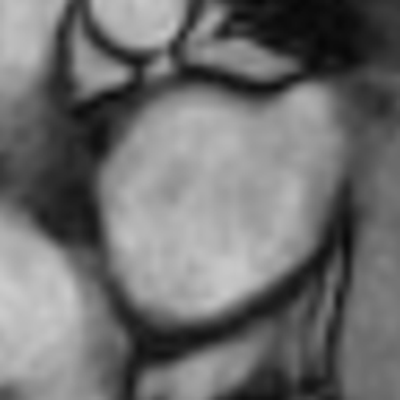
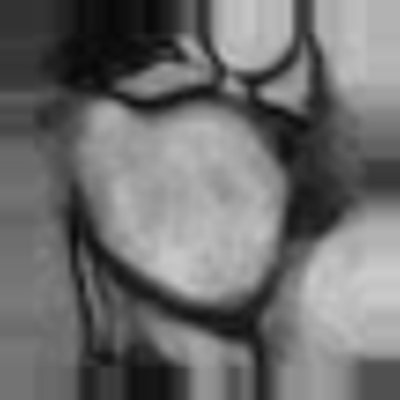
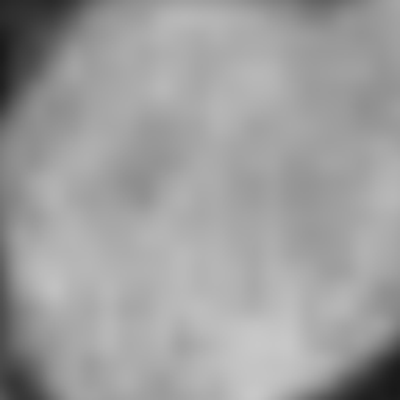
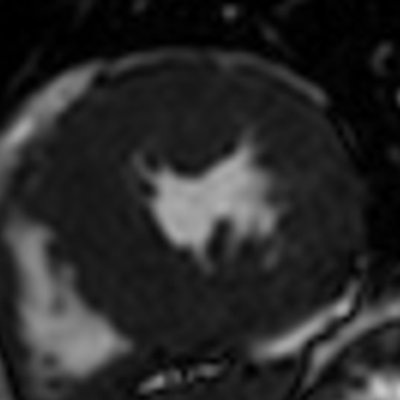
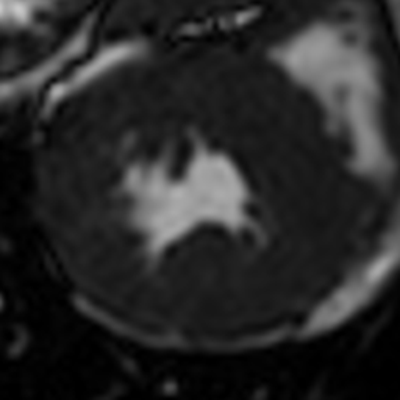
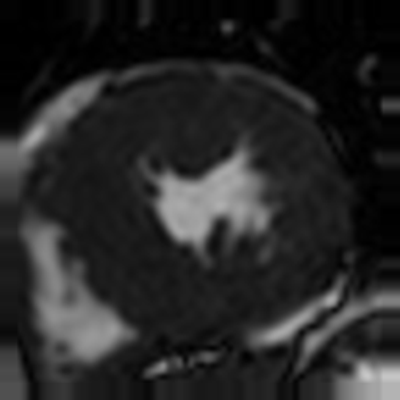
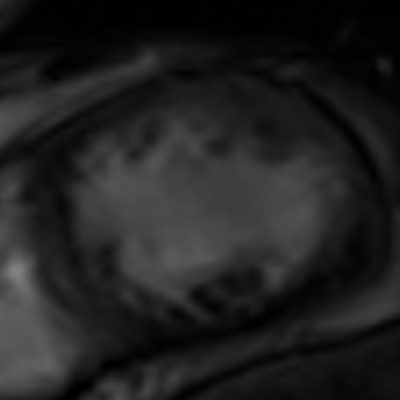
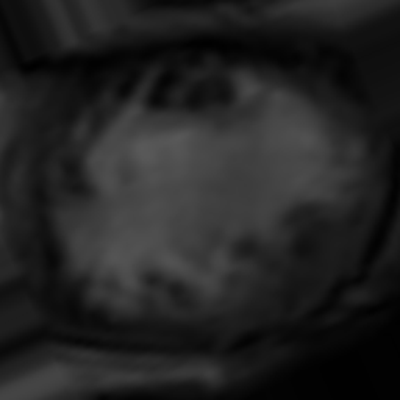
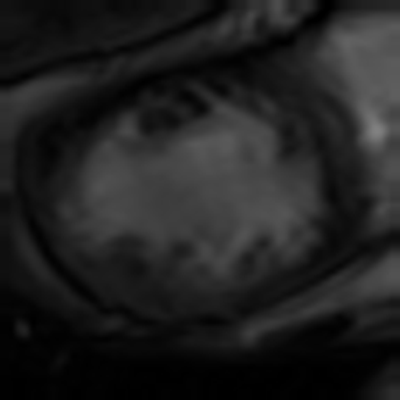
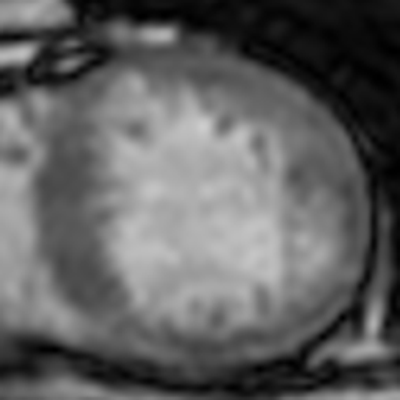
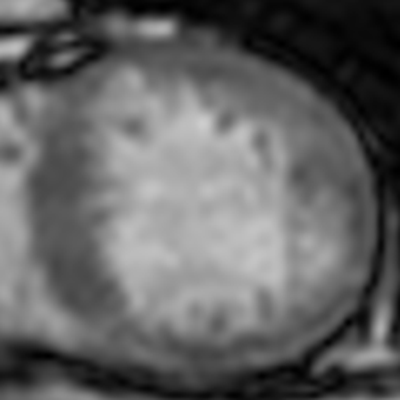
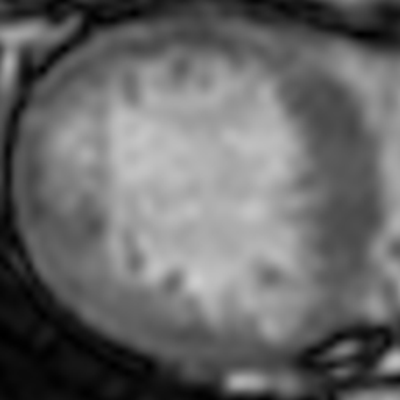


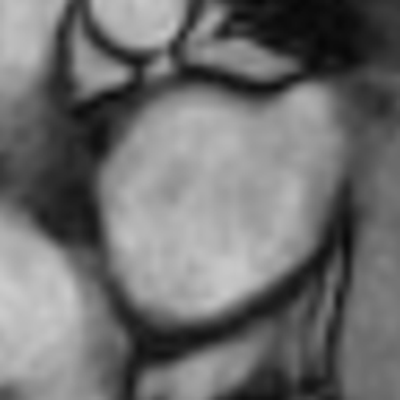
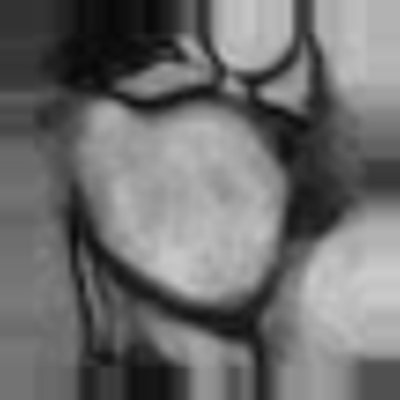
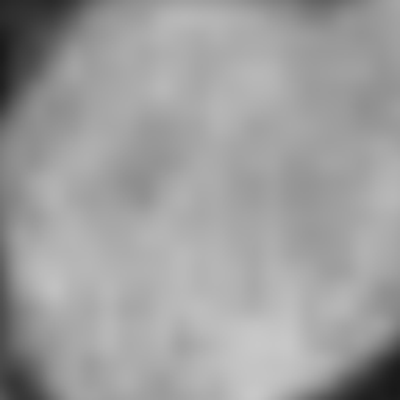
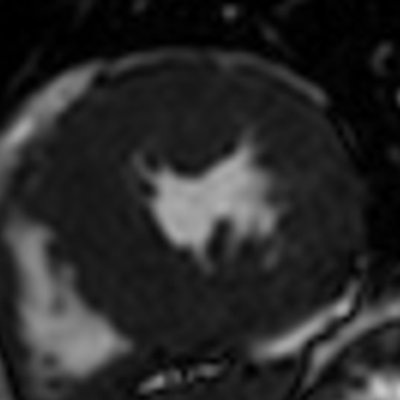
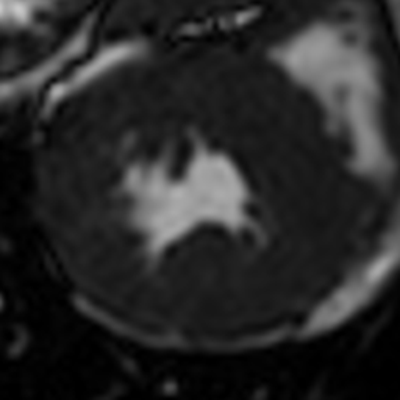
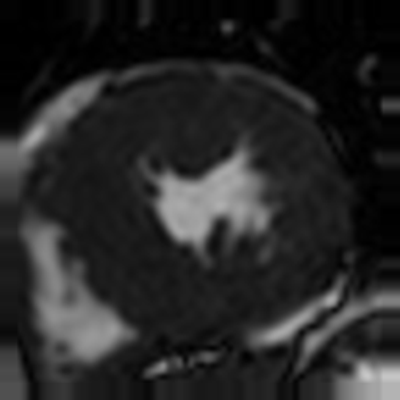
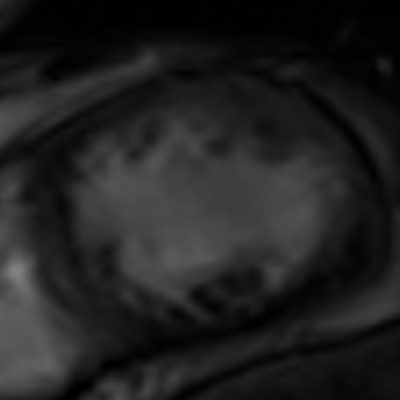
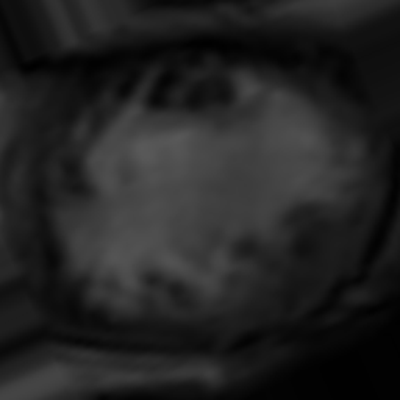
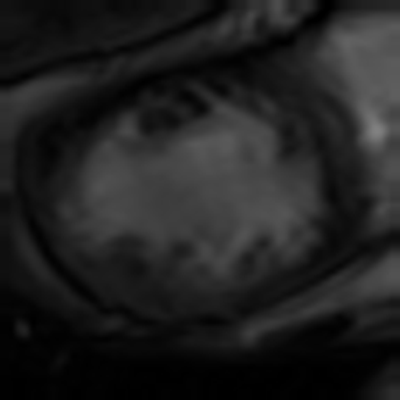
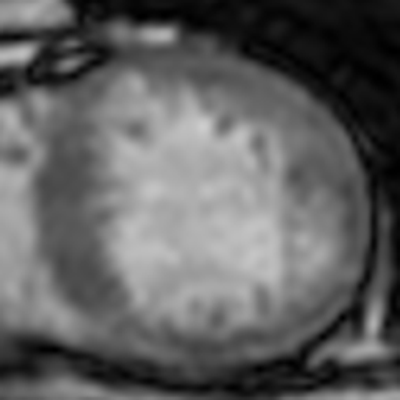
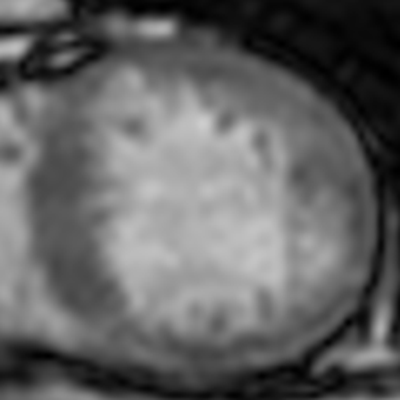
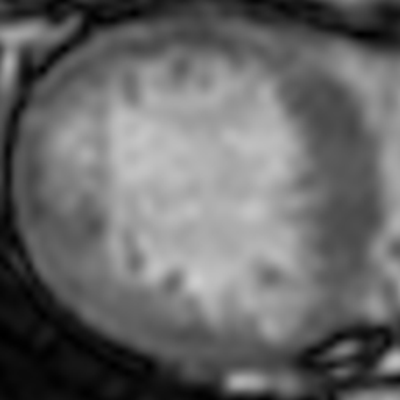

In [38]:
ipyplot.plot_images(results, img_width=400, max_images=len(results))